In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE

In [10]:
imaging_data = pd.read_csv("toy_data_imaging.csv")
imaging_minimal = imaging_data.iloc[:,2:]
y = imaging_data.iloc[:,1]


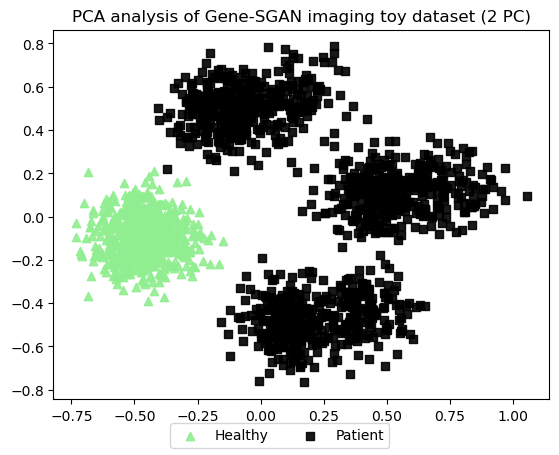

In [11]:
# Healthy and patient data, 2 principal components 

fig, ax = plt.subplots()

pca = PCA(n_components=2,random_state=42)
pca_result = pca.fit_transform(imaging_minimal)

for l, c, m in zip([-1,1], ["lightgreen", "black"], ('^', 's')):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis of Gene-SGAN imaging toy dataset (2 PC)")
labels = ["Healthy","Patient"]
fig.legend(labels, loc='lower center',ncol=len(labels))

In [12]:
# filtering out patient only data 

patient_data = imaging_data.loc[imaging_data["diagnosis"] == 1,:]
patient_minimal = patient_data.iloc[:,2:]
ground_truth = pd.read_csv("toy_data_ground_truth.csv")
y = ground_truth.iloc[:,1]

0.7725201556852933

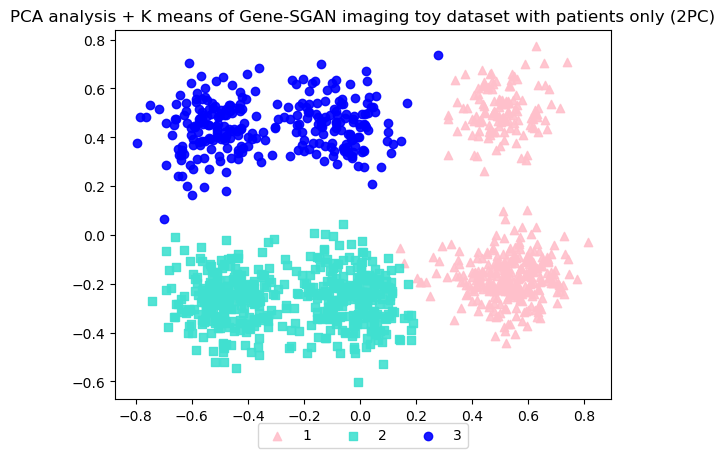

In [13]:
# patient only, 2 principal components 
fig, ax = plt.subplots()

pca = PCA(n_components=2,random_state=42)
pca_result = pca.fit_transform(patient_minimal)


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (2PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


1.0

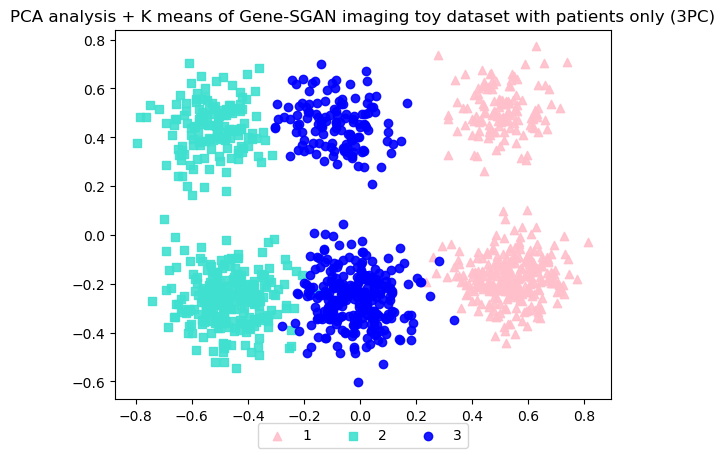

In [14]:
# patient only, 3 principal components 
fig, ax = plt.subplots()

pca = PCA(n_components=3,random_state=42)
pca_result = pca.fit_transform(patient_minimal)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (3PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

#Rand index 

truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


0.7764804003336113

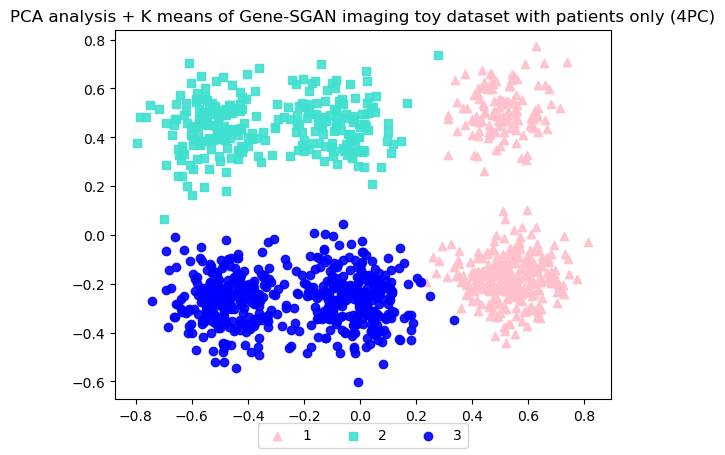

In [15]:
fig, ax = plt.subplots()

pca = PCA(n_components=4,random_state=42)
pca_result = pca.fit_transform(patient_minimal)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (4PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))
truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


1.0

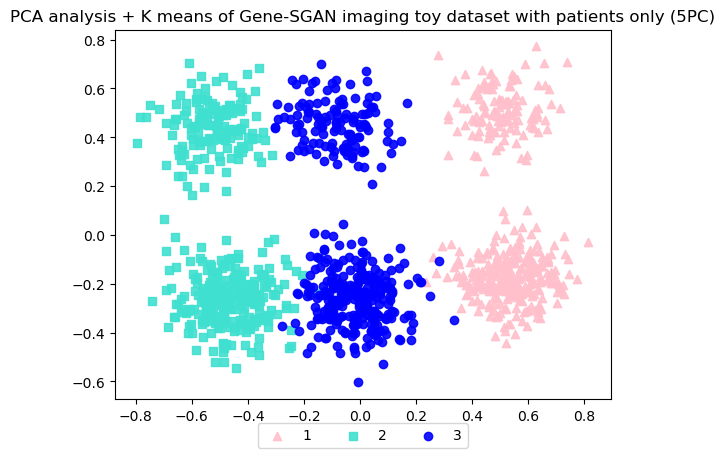

In [16]:
fig, ax = plt.subplots()

pca = PCA(n_components=5,random_state=42)
pca_result = pca.fit_transform(patient_minimal)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (5PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


1.0

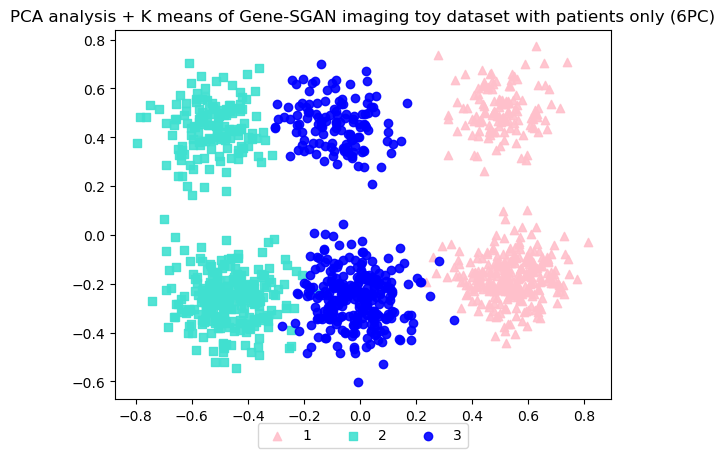

In [17]:
fig, ax = plt.subplots()

pca = PCA(n_components=6,random_state=42)
pca_result = pca.fit_transform(patient_minimal)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (6PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


0.7764804003336113

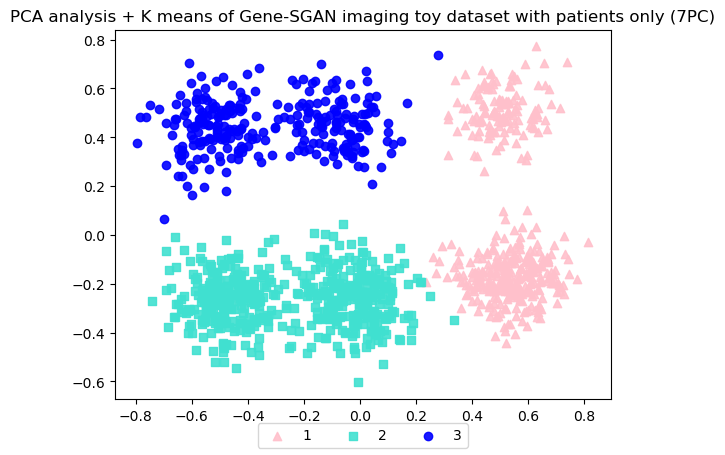

In [18]:
fig, ax = plt.subplots()

pca = PCA(n_components=7,random_state=42)
pca_result = pca.fit_transform(patient_minimal)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (7PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


1.0

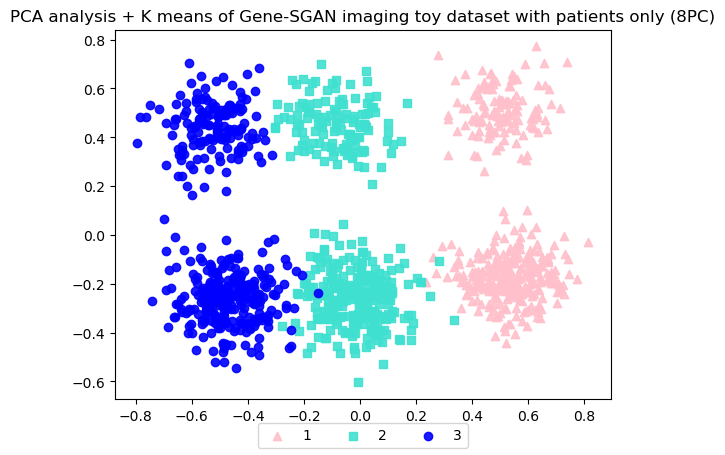

In [19]:
fig, ax = plt.subplots()

pca = PCA(n_components=8,random_state=42)
pca_result = pca.fit_transform(patient_minimal)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only (8PC)")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

truth = pd.read_csv("toy_data_ground_truth.csv")
metrics.rand_score(truth.iloc[:,1], y)


In [24]:
for i in range(10):
    pca = PCA(n_components=i+2,random_state=42)
    pca_result = pca.fit_transform(patient_minimal)
    kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
    y = kmeans.labels_
    print(f"{metrics.rand_score(truth.iloc[:,1], y)} number of PC: {i+2}")
    

0.7725201556852933 number of PC: 2
1.0 number of PC: 3
0.7764804003336113 number of PC: 4
1.0 number of PC: 5
1.0 number of PC: 6
0.7764804003336113 number of PC: 7
1.0 number of PC: 8
0.7764804003336113 number of PC: 9
0.7764804003336113 number of PC: 10
0.7764804003336113 number of PC: 11


In [40]:
for i in range(3):
    print(i+2)
 

2
3
4


ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

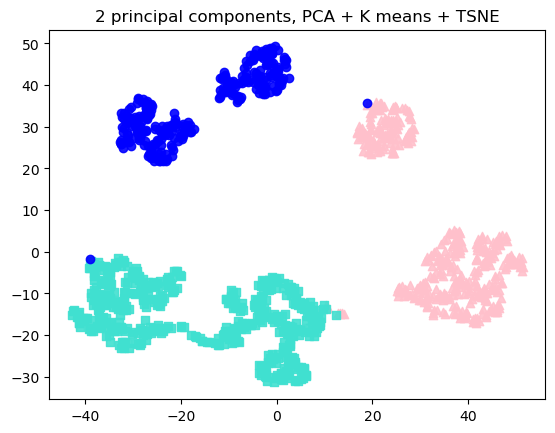

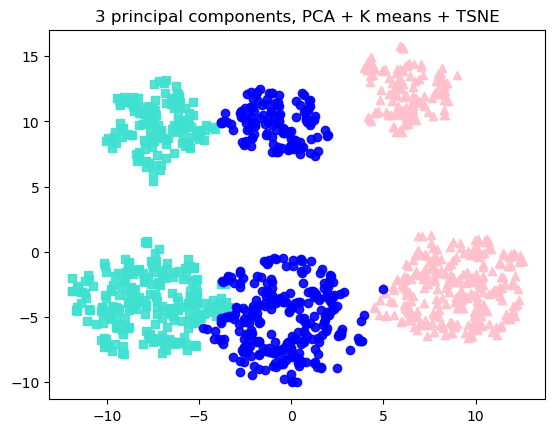

In [43]:
for i in range(2):
    pca = PCA(n_components=i+2,random_state=42)
    pca_result = pca.fit_transform(patient_minimal)
    x = TSNE(n_components = i+2).fit_transform(pca_result)
    kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
    y = kmeans.labels_
    
    fig, ax = plt.subplots() 
    
    for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
        ax.scatter(x[y == l, 0],
                    x[y == l, 1],
                    color=c,
                    label='cluster %s' % l,
                    alpha=0.9,
                    marker=m
                    )
    plt.title(f"{i+2} principal components, PCA + K means + TSNE")

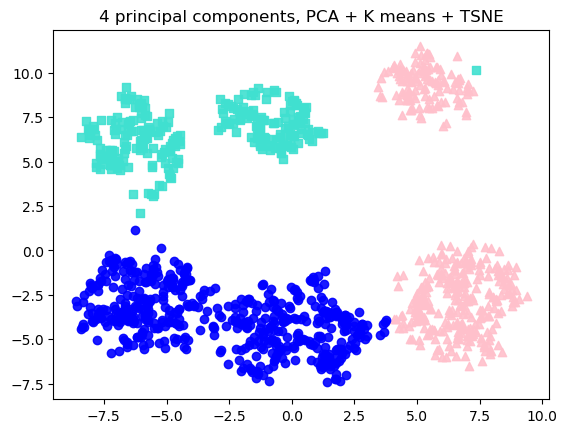

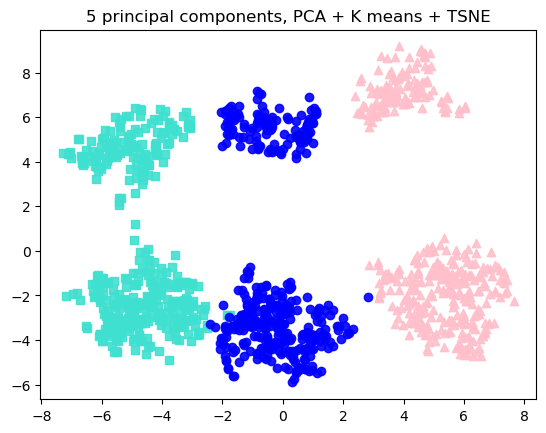

In [44]:
for i in range(4):
    a = i+2
    if a > 3:
        pca = PCA(n_components=a,random_state=42)
        pca_result = pca.fit_transform(patient_minimal)
        x = TSNE(n_components = a, method = "exact").fit_transform(pca_result)
        kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
        y = kmeans.labels_
        fig, ax = plt.subplots() 
        
        for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
            ax.scatter(x[y == l, 0],
                        x[y == l, 1],
                        color=c,
                        label='cluster %s' % l,
                        alpha=0.9,
                        marker=m
                        )
        plt.title(f"{a} principal components, PCA + K means + TSNE")